# 289. Game of Life

<br/>

📎 문제 출처: https://leetcode.com/problems/game-of-life/


> According to Wikipedia's article: "The Game of Life, also known simply as Life, is a cellular automaton devised by the British mathematician John Horton Conway in 1970." <br/>
The board is made up of an m x n grid of cells, where each cell has an initial state: live (represented by a 1) or dead (represented by a 0). Each cell interacts with its eight neighbors (horizontal, vertical, diagonal) using the following four rules (taken from the above Wikipedia article): <br/>
Any live cell with fewer than two live neighbors dies as if caused by under-population. <br/>
Any live cell with two or three live neighbors lives on to the next generation. <br/>
Any live cell with more than three live neighbors dies, as if by over-population. <br/>
Any dead cell with exactly three live neighbors becomes a live cell, as if by reproduction. <br/>
The next state is created by applying the above rules simultaneously to every cell in the current state, where births and deaths occur simultaneously. Given the current state of the m x n grid board, return the next state.


In [1]:
class Solution(object):
    def gameOfLife(self, board):
        """
        :type board: List[List[int]]
        :rtype: None Do not return anything, modify board in-place instead.
        """

### 문제 해석
초기 상태가 주어진 `m x n` 크기의 보드가 있음: **live**(1) or **dead**(0) <br/>
각 cell은 자신의 8명의 이웃(horizontal, vertical, diagonal)과 소통을 하는데 다음 4가지 규칙을 이용한다.
1. fewer than 2 live 이웃을 가진 live cell은 die. (under-population)
2. 2 or 3명의 live 이웃을 가진 live cell은 live.
3. 3명 초과의 live 이웃을 가진 live cell은 die.
4. 3명의 live 이웃을 가진 dead cell은 live cell이 된다. (reproduction)

모든 cell에 위 rule을 동시에 적용함.

### 문제 접근법
- 음.. 자기 자신 주위 8명의 이웃이 live인지 dead인지 봐야 할텐데, 가장자리에 있는 cell들이 문제다.
- 이를 위해 가장 바깥 모서리에 '0' cell을 둘러주자.

### 1st-try

In [94]:
class Solution(object):
    def gameOfLife(self, board):
                
        rows = len(board)
        cols = len(board[0])
        
        # 먼저 바깥에 0을 둘러주자.
        for i in range(rows):
            board[i].insert(0, 0)
            board[i].append(0)
            ''' # 민규님 코드
            board[i] = [0] + board[i] + [0]
            '''
    
        board.insert(0, [0]*(cols+2))
        board.append([0]*(cols+2))
        ''' # 민규님 코드
        topBot = [[0] * (cols+2)]
        board = topBot + board + topBot
        '''
#         print(board)
        
#         nrows = len(board)
#         ncols = len(board[0])
#         print(nrows, ncols)
        
        nsum = 0
        for i in range(1, rows+1):
            for j in range(1, cols+1):
                nsum = sum(board[i-1][j-1:j+2]) + board[i-1][j] + board[i+1][j] + sum(board[i+1][j-1:j+2])
#                 nsum = board[i-1][j] + board[i+1][j] + board[i][j-1] + board[i][j+1]
                if board[i][j]==1:
                    if nsum <= 2:
                        board[i][j] = 0
                    elif nsum <= 3:
                        board[i][j] = 1
                    elif nsum > 3:
                        board[i][j] = 0
                else:
                    if nsum==3:
                        board[i][j] = 1
                        
        for i in range(1, rows+1):
                print(board[i][1:-1])
        
#         return next

In [95]:
sol = Solution()
sol.gameOfLife(board = [[0, 1, 0], [0, 0, 1], [1, 1, 1], [0, 0, 0]])

[0, 0, 0]
[1, 0, 1]
[0, 0, 0]
[0, 0, 0]


- 아직 미완 + 제출도 안 했지만 위와 같이 바로 `대체(replace)`해서 코드를 짜면 안 됨.. 왜냐면 '동시에' 작업이 이루어져야 하기 때문에 !!!
- 새로운 리스트롤 만들고, 거기에 집어넣어야 함 !!!

#### 🤗 추가로 배운 부분
> 리스트 요소 추가는 아래와 같이 간단하게 작성할 수 있다.. 나처럼 insert, append 막 섞어서 안 써도 됨!!

In [137]:
[0] + [0, 1, 0] + [0]

[0, 0, 1, 0, 0]

### 2nd-try
- 각 행에 접근할 때마다 빈 new_row를 만들어 live일지 dead일지 cell 값을 append한다.
- `fewer than`은 미만!
- `board[i][j-1]`과 `board[i][j+1]`을 `board[i-1][j]`, `board[i+1][j]`로 잘못 썼다!!

In [164]:
class Solution(object):
    def gameOfLife(self, board):
                
        rows = len(board)
        cols = len(board[0])
        
        # 먼저 바깥에 0을 둘러주자.
        for i in range(rows):
            board[i].insert(0, 0)
            board[i].append(0)
    
        board.insert(0, [0]*(cols+2))
        board.append([0]*(cols+2))
        
        nsum = 0
        new_board = []
        for i in range(1, rows+1):
            new_row = []
            for j in range(1, cols+1):
                nsum = sum(board[i-1][j-1:j+2]) + board[i][j-1] + board[i][j+1] + sum(board[i+1][j-1:j+2])
                
                if board[i][j]==1: # live일 때 (1-3번)
                    if nsum < 2:
                        new_row.append(0)
                    elif nsum==2 or nsum == 3:
                        new_row.append(1)
                    elif nsum > 3:
                        new_row.append(0)
                        
                else:              # dead일 때 (4번)
                    if nsum==3:
                        new_row.append(1)
                    else:
                        new_row.append(0)
                        
            new_board.append(new_row)
            
        board = new_board
            
#         return new_board

In [165]:
sol = Solution()
sol.gameOfLife(board=[[0, 1, 0], [0, 0, 1], [1, 1, 1], [0, 0, 0]])

[[0, 0, 0], [1, 0, 1], [0, 1, 1], [0, 1, 0]]

In [159]:
sol = Solution()
sol.gameOfLife(board = [[1,1], [1,0]])

[[1, 1], [1, 1]]

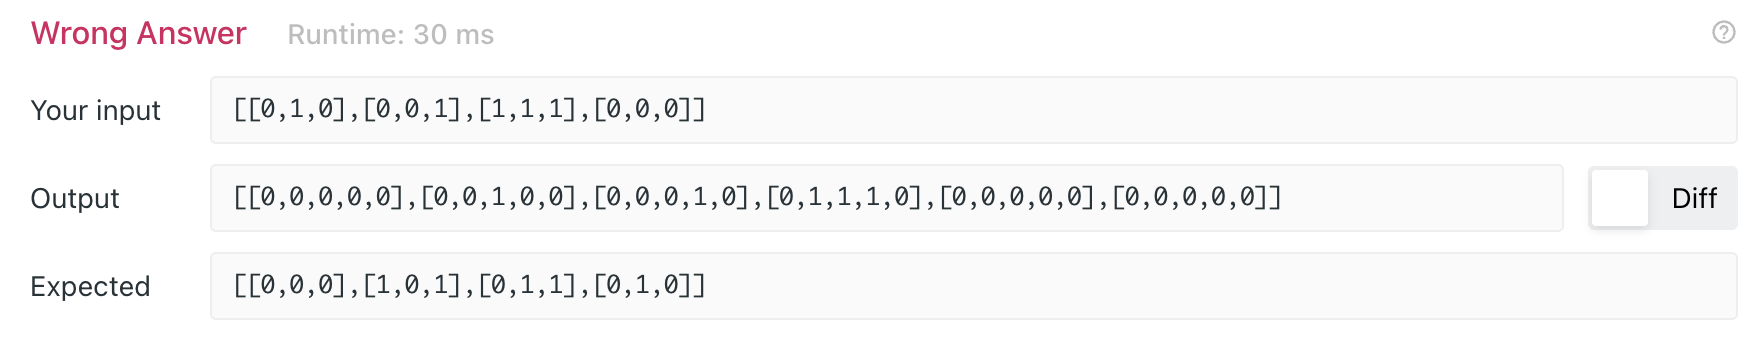

> 🥲 주피터에서는 결과가 잘 나오는데, 리트코드에선 왜 output이 저런 걸까....

### 👍 3rd-try
- 아래 `Follow-up`을 확인해보니 `in-place`로 문제를 풀어야 한다. 즉, 새로운 변수를 생성해 return하면 안 되고, Solution 클래스의 지정된 `board`라는 변수 값 자체를 리턴해줘야 함!
- 그래서 new_board를 새로 만들어주고 board에서 new_board를 할당해주어도 안 되나 보다 ..... (-> 이유 정확히 x)
> - deepcopy를 통해 깊은 복사를 진행해주자.
> - `new_board`를 통해 바깥쪽에 0을 둘러싸 줬으니 원래 board 값을 변경시 인덱스 접근을 신경쓰자!

**a = b; `단순 복사`**
- 객체 주소값만 복사함
- 🔆 어느 한 쪽 상태 변경되면 다른 쪽도 (주소값이) 변경됨!!!!!

**a = copy.deepcopy(b); `깊은 복사`**
- 객체와 객체 내부에 있는 객체까지 모두 새로 만듬
- 복사 객체의 내부 객체는 변하지 x

In [7]:
# copy.deepcopy 적용
import copy

class Solution(object):
    def gameOfLife(self, board):
                
        rows = len(board)
        cols = len(board[0])
        
#         new_board = board # 이렇게 작성하면 위와 같은 결과 나옴
#         new_board = copy.copy(board)
        new_board = copy.deepcopy(board)
        
        # 먼저 바깥에 0을 둘러주자.
        for i in range(rows):
            new_board[i].insert(0, 0)
            new_board[i].append(0)
    
        new_board.insert(0, [0]*(cols+2))
        new_board.append([0]*(cols+2))
        
        nsum = 0
        for i in range(1, rows+1):
            for j in range(1, cols+1):
                nsum = sum(new_board[i-1][j-1:j+2]) + new_board[i][j-1] + new_board[i][j+1] + sum(new_board[i+1][j-1:j+2])
                
                if new_board[i][j]==1: # live일 때 (1-3번)
                    if nsum < 2:
                        board[i-1][j-1]= 0
                    elif nsum==2 or nsum == 3:
                        board[i-1][j-1] = 1
                    elif nsum > 3:
                        board[i-1][j-1] = 0
                        
                else:              # dead일 때 (4번)
                    if nsum==3:
                        board[i-1][j-1] = 1
                    else:
                        board[i-1][j-1] = 0
                                    
        return board

In [8]:
sol = Solution()
sol.gameOfLife(board=[[0, 1, 0], [0, 0, 1], [1, 1, 1], [0, 0, 0]])

[[0, 0, 0], [1, 0, 1], [0, 1, 1], [0, 1, 0]]

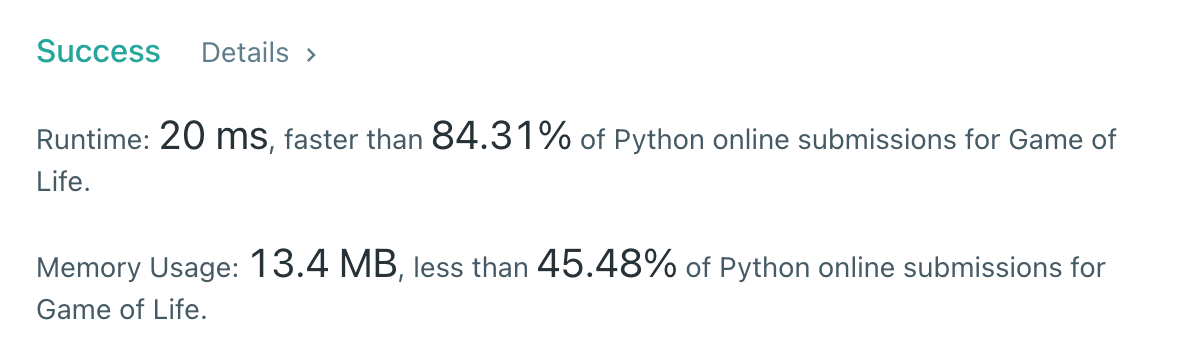